In [1]:
# Start writing code here...

In [2]:
#!pip install pylogit
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 31.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster import hierarchy
from sklearn import cluster

In [4]:
list_ = pd.read_csv('listings.csv')
neighbour_ = pd.read_csv('neighbourhoods.csv')
review_ = pd.read_csv('reviews.csv')

In [5]:
list_full_orig = pd.read_csv('listings_full.csv')
list_full_orig.tail()


id                            listing_url       scrape_id  \
28575  32448015  https://www.airbnb.com/rooms/32448015  20220912200136   
28576  52074454  https://www.airbnb.com/rooms/52074454  20220912200136   
28577  27209676  https://www.airbnb.com/rooms/27209676  20220912200136   
28578  45972779  https://www.airbnb.com/rooms/45972779  20220912200136   
28579  46063715  https://www.airbnb.com/rooms/46063715  20220912200136   

      last_scraped           source  \
28575   2022-09-13  previous scrape   
28576   2022-09-13  previous scrape   
28577   2022-09-13  previous scrape   
28578   2022-09-13  previous scrape   
28579   2022-09-13  previous scrape   

                                                    name  \
28575        Kahuna Bungalow at Pakalana Sanctuary Puako   
28576   Private room in our home near beach w/SUV option   
28577  Luxurious Oceanfront Beach House w/AC & Stunni...   
28578  Incredible 4 Bedrooms with Ocean Views through...   
28579   Great value at this 2 Bedroom Princeville Villa!   

                                             description  \
28575  Our Sanctuary is located in the exclusive beac...   
28576  Great home base for exploring the island! Priv...   
28577  This elegant and timeless oceanfront estate is...   
28578  Beautiful oceanfront property offers breathtak...   
28579  Incredible oceanfront views all the way down t...   

                                   neighborhood_overview  \
28575  Puako is a unique ocean front community.  The ...   
28576                                                NaN   
28577                                 Puako (BIG ISLAND)   
28578                                                NaN   
28579                                                NaN   

                                             picture_url    host_id  ...  \
28575  https://a0.muscache.com/pictures/66f39afb-dcd6...    3299481  ...   
28576  https://a0.muscache.com/pictures/miso/Hosting-...    2773101  ...   
28577  https://a0.muscache.com/pictures/prohost-api/H...  107293305  ...   
28578  https://a0.muscache.com/pictures/9fc47832-39ef...   10219064  ...   
28579  https://a0.muscache.com/pictures/09cb068e-c4d7...   10219064  ...   

      review_scores_communication review_scores_location review_scores_value  \
28575                        4.78                   4.91                4.72   
28576                         NaN                    NaN                 NaN   
28577                        5.00                   5.00                4.38   
28578                         NaN                    NaN                 NaN   
28579                         NaN                    NaN                 NaN   

                                   license instant_bookable  \
28575                   TA-177-225-1648-01                t   
28576                                  NaN                f   
28577  TA-180-877-8240-01   STVR 19-351310                t   
28578                         280190040015                f   
28579                         540050120028                f   

      calculated_host_listings_count  \
28575                              6   
28576                              1   
28577                            306   
28578                             48   
28579                             48   

      calculated_host_listings_count_entire_homes  \
28575                                           1   
28576                                           0   
28577                                         306   
28578                                          48   
28579                                          48   

      calculated_host_listings_count_private_rooms  \
28575                                            5   
28576                                            1   
28577                                            0   
28578                                            0   
28579                                            0   

      calculated_host_listings_count_shared_room

In [6]:
# import statistics
# first_review = list_full_['first_review'].copy().tolist()
# first_review_2 = [item for item in first_review if not pd.isnull(item)]
# statistics.median(first_review_2)
# min(first_review_2)


In [7]:
# make a copy of only the columns we need to use
list_full_orig= list_full_orig[['id','latitude','longitude',
        'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost',  'host_listings_count',
       'host_total_listings_count','price',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 
       'beds','bathrooms_text','has_availability',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable','reviews_per_month']]


In [8]:
list_full_orig.dropna(how = 'any', inplace = True)

In [9]:
list_full_ = list_full_orig[['id',
        'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost',  'host_listings_count',
       'host_total_listings_count','price',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 
       'beds','bathrooms_text','has_availability',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable','reviews_per_month']]

In [10]:
list_full_

id host_response_rate host_acceptance_rate host_is_superhost  \
1      34843927                99%                  99%                 f   
2      35067513               100%                 100%                 t   
4      34857616                99%                  75%                 t   
6          5269                80%                  73%                 t   
7          5387               100%                  99%                 f   
...         ...                ...                  ...               ...   
28571  15468648               100%                 100%                 f   
28573  11967793               100%                 100%                 f   
28574  17751486                96%                 100%                 f   
28575  32448015               100%                 100%                 t   
28577  27209676               100%                  98%                 t   

       host_listings_count  host_total_listings_count      price  \
1                      3.0                        7.0     $83.00   
2                      2.0                        2.0    $622.00   
4                    581.0                      628.0    $206.00   
6                      3.0                       18.0    $149.00   
7                      3.0                        3.0     $91.00   
...                    ...                        ...        ...   
28571                  6.0                       22.0    $250.00   
28573                  1.0                        1.0    $295.00   
28574                121.0                      221.0    $234.00   
28575                  6.0                        6.0    $300.00   
28577                327.0                      382.0  $2,300.00   

      neighbourhood_cleansed neighbourhood_group_cleansed        room_type  \
1                 North Kona                       Hawaii     Private room   
2                    Lahaina                         Maui  Entire home/apt   
4                Koloa-Poipu                        Kauai     Private room   
6               South Kohala                       Hawaii  Entire home/apt   
7                 South Kona                       Hawaii  Entire home/apt   
...                      ...                          ...              ...   
28571              Koolauloa                     Honolulu  Entire home/apt   
28573             South Hilo                       Hawaii  Entire home/apt   
28574                Lahaina                         Maui  Entire home/apt   
28575           South Kohala                       Hawaii     Private room   
28577           South Kohala                       Hawaii  Entire home/apt   

       ...  number_of_reviews_l30d  review_scores_rating  \
1      ...                       3                  4.41   
2      ...                       0                  5.00   
4      ...                       0                  5.00   
6      ...                       0                  4.65   
7      ...                       3                  4.65   
...    ...                     ...                   ...   
28571  ...                       0                  4.54   
28573  ...                       0                  5.00   
28574  ...                       2                  4.90   
28575  ...                       0                  4.72   
28577  ...                       0                  5.00   

      review_scores_accuracy review_scores_cleanliness  review_scores_checkin  \
1                       4.46                      4.40                   4.65   
2                       4.97                      4.99                   4.99   
4                       5.00                      5.00                   5.00   
6                       4.83                      4.35                   5.00   
7                       4.67                      4.44                   4.85   
...                      ...                       ...                    ...   
28571                   4.60                  

In [11]:
#one-hot-encoder here
def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder() 
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot

array_neighbourhood=list(list_full_['neighbourhood_group_cleansed'])
one_hot_neighbourhood=pd.DataFrame(one_hot_encoder(array_neighbourhood), columns=['Hawaii','Honolulu','Kauai','Maui'])

array_room_type=list(list_full_['room_type'])
one_hot_room_type=pd.DataFrame(one_hot_encoder(array_room_type), columns=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'])

# array_host_since = list(list_full_file['host_since'].str[:4])
# one_hot_host_since=pd.DataFrame(one_hot_encoder(array_host_since), columns=['host_since_2008','host_since_2009','host_since_2010','host_since_2011','host_since_2012','host_since_2013','host_since_2014','host_since_2015','host_since_2016','host_since_2017','host_since_2018','host_since_2019','host_since_2020','host_since_2021','host_since_2022','host_since_nan'])

array_availability=list(list_full_['has_availability'])
one_hot_availability=pd.DataFrame(one_hot_encoder(array_availability), columns=['Availability_No','Availability_Yes'])

array_instant_bookable=list(list_full_['instant_bookable'])
one_hot_instant_bookable=pd.DataFrame(one_hot_encoder(array_instant_bookable), columns=['Instant_Bookable_No','Instant_Bookable_Yes'])

array_superhost=list(list_full_['host_is_superhost'])
one_hot_superhost=pd.DataFrame(one_hot_encoder(array_superhost), columns=['Superhost_No','Superhost_Yes'])

one_hot_all = pd.concat([one_hot_neighbourhood,one_hot_room_type,one_hot_availability,one_hot_instant_bookable,one_hot_superhost],axis=1)

array_bathrooms=[]

for x in list_full_['bathrooms_text']:
    if x == 'Half-bath' or x == 'Private half-bath' or x =='Shared half-bath':
        array_bathrooms.append(0.5)

    else:
        array_bathrooms.append(float(x.split(' ')[0]))

one_hot_all['bathrooms'] = array_bathrooms
one_hot_all

Hawaii  Honolulu  Kauai  Maui  Entire home/apt  Hotel room  \
0         1.0       0.0    0.0   0.0              0.0         0.0   
1         0.0       0.0    0.0   1.0              1.0         0.0   
2         0.0       0.0    1.0   0.0              0.0         0.0   
3         1.0       0.0    0.0   0.0              1.0         0.0   
4         1.0       0.0    0.0   0.0              1.0         0.0   
...       ...       ...    ...   ...              ...         ...   
21470     0.0       1.0    0.0   0.0              1.0         0.0   
21471     1.0       0.0    0.0   0.0              1.0         0.0   
21472     0.0       0.0    0.0   1.0              1.0         0.0   
21473     1.0       0.0    0.0   0.0              0.0         0.0   
21474     1.0       0.0    0.0   0.0              1.0         0.0   

       Private room  Shared room  Availability_No  Availability_Yes  \
0               1.0          0.0              0.0               1.0   
1               0.0          0.0              0.0               1.0   
2               1.0          0.0              0.0               1.0   
3               0.0          0.0              0.0               1.0   
4               0.0          0.0              0.0               1.0   
...             ...          ...              ...               ...   
21470           0.0          0.0              0.0               1.0   
21471           0.0          0.0              0.0               1.0   
21472           0.0          0.0              0.0               1.0   
21473           1.0          0.0              0.0               1.0   
21474           0.0          0.0              0.0               1.0   

       Instant_Bookable_No  Instant_Bookable_Yes  Superhost_No  Superhost_Yes  \
0                      0.0                   1.0           1.0            0.0   
1                      0.0                   1.0           0.0            1.0   
2                      1.0                   0.0           0.0            1.0   
3                      1.0                   0.0           0.0            1.0   
4                      0.0                   1.0           1.0            0.0   
...                    ...                   ...           ...            ...   
21470                  0.0                   1.0           1.0            0.0   
21471                  1.0                   0.0           1.0            0.0   
21472                  0.0                   1.0           1.0            0.0   
21473                  0.0                   1.0           0.0            1.0   
21474                  0.0                   1.0           0.0            1.0   

       bathrooms  
0            1.5  
1            1.0  
2            2.0  
3            1.0  
4            1.0  
...          ...  
21470        1.0  
21471        1.0  
21472        1.0  
21473        1.5  
21474        4.0  

[21475 rows x 15 columns]

In [12]:
list_full_.reset_index(drop=True, inplace=True)
one_hot_all.reset_index(drop=True, inplace=True)
list_final_ = pd.concat([list_full_,one_hot_all], axis=1)
list_final_

id host_response_rate host_acceptance_rate host_is_superhost  \
0      34843927                99%                  99%                 f   
1      35067513               100%                 100%                 t   
2      34857616                99%                  75%                 t   
3          5269                80%                  73%                 t   
4          5387               100%                  99%                 f   
...         ...                ...                  ...               ...   
21470  15468648               100%                 100%                 f   
21471  11967793               100%                 100%                 f   
21472  17751486                96%                 100%                 f   
21473  32448015               100%                 100%                 t   
21474  27209676               100%                  98%                 t   

       host_listings_count  host_total_listings_count      price  \
0                      3.0                        7.0     $83.00   
1                      2.0                        2.0    $622.00   
2                    581.0                      628.0    $206.00   
3                      3.0                       18.0    $149.00   
4                      3.0                        3.0     $91.00   
...                    ...                        ...        ...   
21470                  6.0                       22.0    $250.00   
21471                  1.0                        1.0    $295.00   
21472                121.0                      221.0    $234.00   
21473                  6.0                        6.0    $300.00   
21474                327.0                      382.0  $2,300.00   

      neighbourhood_cleansed neighbourhood_group_cleansed        room_type  \
0                 North Kona                       Hawaii     Private room   
1                    Lahaina                         Maui  Entire home/apt   
2                Koloa-Poipu                        Kauai     Private room   
3               South Kohala                       Hawaii  Entire home/apt   
4                 South Kona                       Hawaii  Entire home/apt   
...                      ...                          ...              ...   
21470              Koolauloa                     Honolulu  Entire home/apt   
21471             South Hilo                       Hawaii  Entire home/apt   
21472                Lahaina                         Maui  Entire home/apt   
21473           South Kohala                       Hawaii     Private room   
21474           South Kohala                       Hawaii  Entire home/apt   

       ...  Hotel room  Private room Shared room Availability_No  \
0      ...         0.0           1.0         0.0             0.0   
1      ...         0.0           0.0         0.0             0.0   
2      ...         0.0           1.0         0.0             0.0   
3      ...         0.0           0.0         0.0             0.0   
4      ...         0.0           0.0         0.0             0.0   
...    ...         ...           ...         ...             ...   
21470  ...         0.0           0.0         0.0             0.0   
21471  ...         0.0           0.0         0.0             0.0   
21472  ...         0.0           0.0         0.0             0.0   
21473  ...         0.0           1.0         0.0             0.0   
21474  ...         0.0           0.0         0.0             0.0   

       Availability_Yes  Instant_Bookable_No  Instant_Bookable_Yes  \
0                   1.0                  0.0                   1.0   
1                   1.0                  0.0                   1.0   
2                   1.0                  1.0                   0.0   
3                   1.0                  1.0                   0.0   
4                   1.0                  0.0                   1.0   
...                 ...                  ...                   ...   
21470               1.0    

In [13]:
list_final_.drop(['has_availability','host_is_superhost','instant_bookable','neighbourhood_cleansed','neighbourhood_group_cleansed','room_type','bathrooms_text'], axis = 1, inplace = True)

In [14]:
list_final_['host_response_rate'] = list_final_['host_response_rate'].astype(str)
list_final_['host_acceptance_rate'] = list_final_['host_acceptance_rate'].astype(str)
list_final_['price'] = list_final_['price'].astype(str)
list_final_['host_response_rate'] = list_final_['host_response_rate'].str.replace('%','')
list_final_['host_acceptance_rate'] = list_final_['host_acceptance_rate'].str.replace('%','')
list_final_['price'] = list_final_['price'].str.replace('$','')
list_final_['price'] = list_final_['price'].str.replace(',','')
list_final_['host_response_rate'] = list_final_['host_response_rate'].astype(float)
list_final_['host_acceptance_rate'] = list_final_['host_acceptance_rate'].astype(float)
list_final_['price'] = list_final_['price'].astype(float)
list_final_

/tmp/ipykernel_146/4136732199.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  list_final_['price'] = list_final_['price'].str.replace('$','')


id  host_response_rate  host_acceptance_rate  \
0      34843927                99.0                  99.0   
1      35067513               100.0                 100.0   
2      34857616                99.0                  75.0   
3          5269                80.0                  73.0   
4          5387               100.0                  99.0   
...         ...                 ...                   ...   
21470  15468648               100.0                 100.0   
21471  11967793               100.0                 100.0   
21472  17751486                96.0                 100.0   
21473  32448015               100.0                 100.0   
21474  27209676               100.0                  98.0   

       host_listings_count  host_total_listings_count   price  accommodates  \
0                      3.0                        7.0    83.0             3   
1                      2.0                        2.0   622.0             2   
2                    581.0                      628.0   206.0             6   
3                      3.0                       18.0   149.0             2   
4                      3.0                        3.0    91.0             2   
...                    ...                        ...     ...           ...   
21470                  6.0                       22.0   250.0             6   
21471                  1.0                        1.0   295.0             2   
21472                121.0                      221.0   234.0             4   
21473                  6.0                        6.0   300.0             2   
21474                327.0                      382.0  2300.0             8   

       beds  minimum_nights  maximum_nights  ...  Hotel room  Private room  \
0       2.0               1            1125  ...         0.0           1.0   
1       1.0               1             365  ...         0.0           0.0   
2       3.0               2            1125  ...         0.0           1.0   
3       1.0               5            1125  ...         0.0           0.0   
4       2.0               5              60  ...         0.0           0.0   
...     ...             ...             ...  ...         ...           ...   
21470   2.0              29              90  ...         0.0           0.0   
21471   1.0               2               7  ...         0.0           0.0   
21472   2.0               5              28  ...         0.0           0.0   
21473   1.0               2            1125  ...         0.0           1.0   
21474   4.0               1             365  ...         0.0           0.0   

       Shared room  Availability_No  Availability_Yes  Instant_Bookable_No  \
0              0.0              0.0               1.0                  0.0   
1              0.0              0.0               1.0                  0.0   
2              0.0              0.0               1.0                  1.0   
3              0.0              0.0               1.0                  1.0   
4              0.0              0.0               1.0                  0.0   
...            ...              ...               ...                  ...   
21470          0.0              0.0               1.0                  0.0   
21471          0.0              0.0               1.0                  1.0   
21472          0.0              0.0               1.0                  0.0   
21473          0.0              0.0               1.0                  0.0   
21474          0.0              0.0               1.0                  0.0   

       Instant_Bookable_Yes  Superhost_No  Superhost_Yes  bathrooms  
0                       1.0           1.0            0.0        1.5  
1                       1.0           0.0            1.0        1.0  
2                       0.0           0.0            1.0        2.0  
3                       0.0           0.0            1.0        1.0  
4                       1.0           1.0            0.0        1.0  
...                     ...          

In [15]:
list_final_.shape

(21475, 36)

<function matplotlib.pyplot.show(close=None, block=None)>

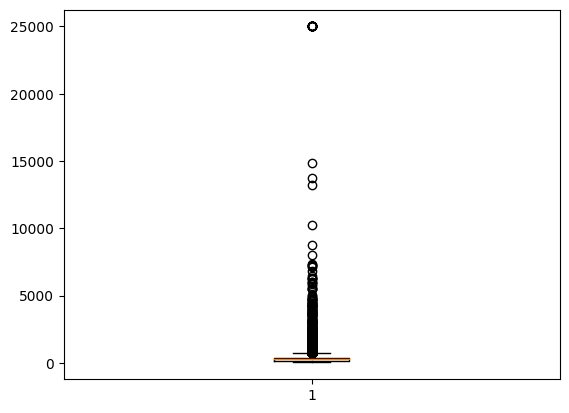

In [16]:
plt.boxplot(list_final_['price'])
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x7f937f3332e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f937ef75fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f937f333e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f937ef75ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f937ef75a90>],
 'means': []}

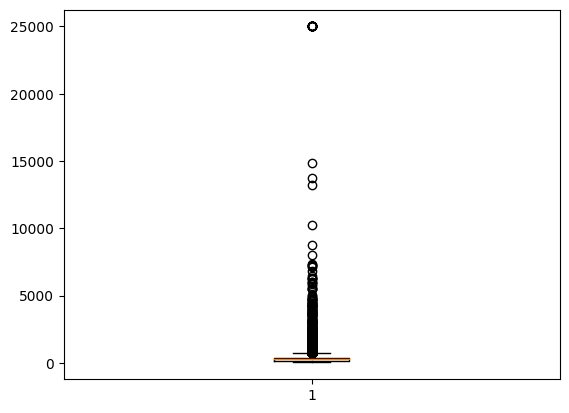

In [17]:
plt.boxplot(list_final_['price'])

In [18]:
list_final_ = list_final_[list_final_['price'] < 500]

In [19]:
list_final_.shape

(18463, 36)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f937f055100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f937f055640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f937efe8e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f937f055b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f937f055e20>],
 'means': []}

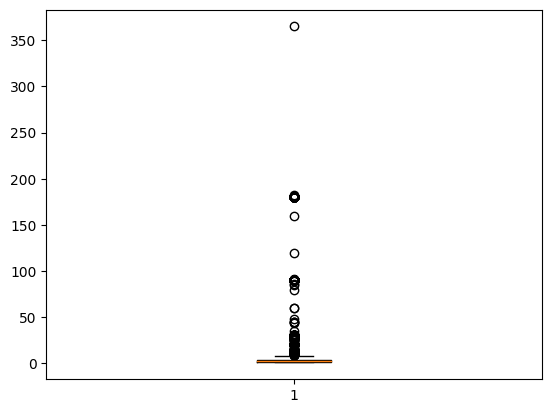

In [20]:
plt.boxplot(list_final_['minimum_nights'])

In [21]:
list_final_ = list_final_[list_final_['minimum_nights'] < 50]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f937f07d4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f937f07da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f937f07d220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f937f07df40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f937f1ee220>],
 'means': []}

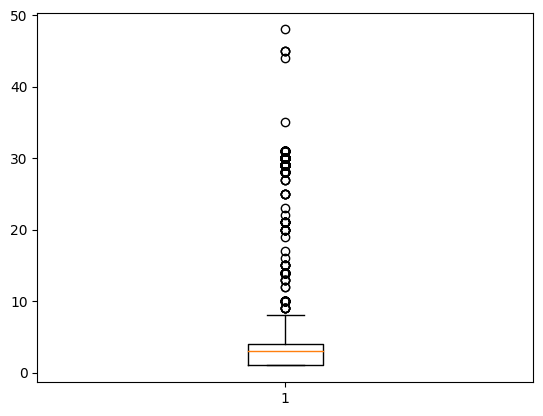

In [22]:
plt.boxplot(list_final_['minimum_nights'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f937f2d0790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f937f2d0bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f937f2d04f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f937f2c2130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f937f2c23d0>],
 'means': []}

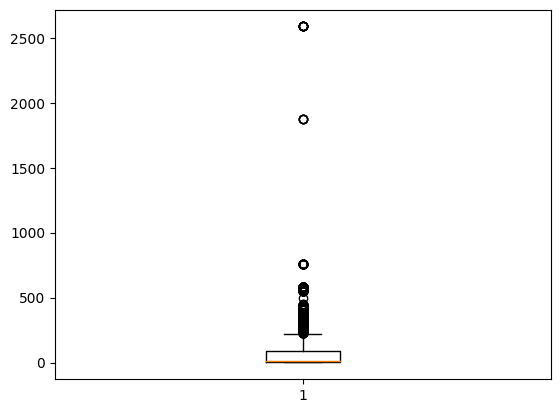

In [23]:
plt.boxplot(list_final_['host_listings_count'])

In [24]:
list_final_ = list_final_[list_final_['host_listings_count'] < 500]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f937f18a490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f937f18a8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f937f18a1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f937f18adf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f937f1980d0>],
 'means': []}

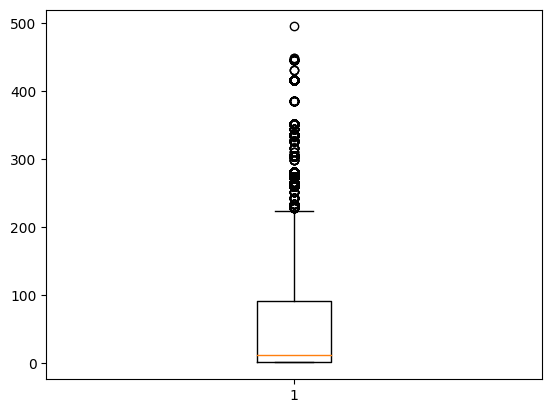

In [25]:
plt.boxplot(list_final_['host_listings_count'])

In [26]:
list_final_.shape

(17938, 36)

In [27]:
list_final_

id  host_response_rate  host_acceptance_rate  \
0      34843927                99.0                  99.0   
3          5269                80.0                  73.0   
4          5387               100.0                  99.0   
5      35069540               100.0                  86.0   
6          5389               100.0                  99.0   
...         ...                 ...                   ...   
21469  46508842               100.0                  99.0   
21470  15468648               100.0                 100.0   
21471  11967793               100.0                 100.0   
21472  17751486                96.0                 100.0   
21473  32448015               100.0                 100.0   

       host_listings_count  host_total_listings_count  price  accommodates  \
0                      3.0                        7.0   83.0             3   
3                      3.0                       18.0  149.0             2   
4                      3.0                        3.0   91.0             2   
5                      2.0                        2.0  150.0             3   
6                      3.0                        3.0  301.0             6   
...                    ...                        ...    ...           ...   
21469                  2.0                        2.0  145.0             4   
21470                  6.0                       22.0  250.0             6   
21471                  1.0                        1.0  295.0             2   
21472                121.0                      221.0  234.0             4   
21473                  6.0                        6.0  300.0             2   

       beds  minimum_nights  maximum_nights  ...  Hotel room  Private room  \
0       2.0               1            1125  ...         0.0           1.0   
3       1.0               5            1125  ...         0.0           0.0   
4       2.0               5              60  ...         0.0           0.0   
5       1.0               1            1125  ...         0.0           0.0   
6       4.0               6             180  ...         0.0           0.0   
...     ...             ...             ...  ...         ...           ...   
21469   3.0               1              21  ...         0.0           0.0   
21470   2.0              29              90  ...         0.0           0.0   
21471   1.0               2               7  ...         0.0           0.0   
21472   2.0               5              28  ...         0.0           0.0   
21473   1.0               2            1125  ...         0.0           1.0   

       Shared room  Availability_No  Availability_Yes  Instant_Bookable_No  \
0              0.0              0.0               1.0                  0.0   
3              0.0              0.0               1.0                  1.0   
4              0.0              0.0               1.0                  0.0   
5              0.0              0.0               1.0                  0.0   
6              0.0              0.0               1.0                  1.0   
...            ...              ...               ...                  ...   
21469          0.0              0.0               1.0                  1.0   
21470          0.0              0.0               1.0                  0.0   
21471          0.0              0.0               1.0                  1.0   
21472          0.0              0.0               1.0                  0.0   
21473          0.0              0.0               1.0                  0.0   

       Instant_Bookable_Yes  Superhost_No  Superhost_Yes  bathrooms  
0                       1.0           1.0            0.0        1.5  
3                       0.0           0.0            1.0        1.0  
4                       1.0           1.0            0.0        1.0  
5                       1.0           1.0            0.0        1.0  
6                       0.0           1.0            0.0        3.0  
...                     ...           ...        

In [28]:
#label encoder for neighbourhood group
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(list_['neighbourhood_group']) #give it the original column that contains the categorical variables
#list_['neighbourhood_group'] = encoder.transform(list_['neighbourhood_group'])
#list_['neighbourhood_group']

In [29]:
#label encoder for room_type
#encoder.fit(list_['room_type']) #give it the original column that contains the categorical variables
#list_['room_type'] = encoder.transform(list_['room_type'])
#list_['room_type']

# Data Preprocessing

### Equal Frequency Data Binning (Price variable)

In [30]:
min_price = list_final_['price'].min()
max_price = list_final_['price'].max()
min_price, max_price

(23.0, 499.0)

In [31]:
price_copy = list_final_['price'].copy().tolist()

In [32]:
price_copy.sort()

In [33]:
#equal frequency
def equifreq(arr1, m):
    result = []    
    a = len(arr1)
    n = int(a / m)
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
    
        result.append(arr)
    return result 

### 3 Data Bins

In [34]:
three_bins = equifreq(price_copy, 3)

bin_1_start = min(three_bins[0])
bin_1_end = max(three_bins[0])
bin_2_start = min(three_bins[1])
bin_2_end = max(three_bins[1])
bin_3_start = min(three_bins[2])
bin_3_end = max(three_bins[2])

print(f'1st bin: {bin_1_start}, {bin_1_end}')
print(f'2nd bin: {bin_2_start}, {bin_2_end}')
print(f'3rd bin: {bin_3_start}, {bin_3_end}')

1st bin: 23.0, 170.0
2nd bin: 170.0, 275.0
3rd bin: 275.0, 499.0


In [35]:
conditions_3 = [
    (list_final_['price'] >= 0) & (list_final_['price'] <= bin_1_end),
    (list_final_['price'] > bin_2_start) & (list_final_['price'] <= bin_2_end),
    (list_final_['price'] > bin_3_start) & (list_final_['price'] <= bin_3_end)
]
values_3 = ['Low', 'Medium', 'High']

list_final_3_bins = list_final_.copy()
list_final_3_bins['price'] = np.select(conditions_3, values_3)

list_final_3_bins

id  host_response_rate  host_acceptance_rate  \
0      34843927                99.0                  99.0   
3          5269                80.0                  73.0   
4          5387               100.0                  99.0   
5      35069540               100.0                  86.0   
6          5389               100.0                  99.0   
...         ...                 ...                   ...   
21469  46508842               100.0                  99.0   
21470  15468648               100.0                 100.0   
21471  11967793               100.0                 100.0   
21472  17751486                96.0                 100.0   
21473  32448015               100.0                 100.0   

       host_listings_count  host_total_listings_count   price  accommodates  \
0                      3.0                        7.0     Low             3   
3                      3.0                       18.0     Low             2   
4                      3.0                        3.0     Low             2   
5                      2.0                        2.0     Low             3   
6                      3.0                        3.0    High             6   
...                    ...                        ...     ...           ...   
21469                  2.0                        2.0     Low             4   
21470                  6.0                       22.0  Medium             6   
21471                  1.0                        1.0    High             2   
21472                121.0                      221.0  Medium             4   
21473                  6.0                        6.0    High             2   

       beds  minimum_nights  maximum_nights  ...  Hotel room  Private room  \
0       2.0               1            1125  ...         0.0           1.0   
3       1.0               5            1125  ...         0.0           0.0   
4       2.0               5              60  ...         0.0           0.0   
5       1.0               1            1125  ...         0.0           0.0   
6       4.0               6             180  ...         0.0           0.0   
...     ...             ...             ...  ...         ...           ...   
21469   3.0               1              21  ...         0.0           0.0   
21470   2.0              29              90  ...         0.0           0.0   
21471   1.0               2               7  ...         0.0           0.0   
21472   2.0               5              28  ...         0.0           0.0   
21473   1.0               2            1125  ...         0.0           1.0   

       Shared room  Availability_No  Availability_Yes  Instant_Bookable_No  \
0              0.0              0.0               1.0                  0.0   
3              0.0              0.0               1.0                  1.0   
4              0.0              0.0               1.0                  0.0   
5              0.0              0.0               1.0                  0.0   
6              0.0              0.0               1.0                  1.0   
...            ...              ...               ...                  ...   
21469          0.0              0.0               1.0                  1.0   
21470          0.0              0.0               1.0                  0.0   
21471          0.0              0.0               1.0                  1.0   
21472          0.0              0.0               1.0                  0.0   
21473          0.0              0.0               1.0                  0.0   

       Instant_Bookable_Yes  Superhost_No  Superhost_Yes  bathrooms  
0                       1.0           1.0            0.0        1.5  
3                       0.0           0.0            1.0        1.0  
4                       1.0           1.0            0.0        1.0  
5                       1.0           1.0            0.0        1.0  
6                       0.0           1.0            0.0        3.0  
...                     ...          

### 5 Data Bins

In [36]:
five_bins = equifreq(price_copy, 5)

bin_1_start = min(five_bins[0])
bin_1_end = max(five_bins[0])
bin_2_start = min(five_bins[1])
bin_2_end = max(five_bins[1])
bin_3_start = min(five_bins[2])
bin_3_end = max(five_bins[2])
bin_4_start = min(five_bins[3])
bin_4_end = max(five_bins[3])
bin_5_start = min(five_bins[4])
bin_5_end = max(five_bins[4])

print(f'1st bin: {min(five_bins[0])}, {max(five_bins[0])}')
print(f'2nd bin: {min(five_bins[1])}, {max(five_bins[1])}')
print(f'3rd bin: {min(five_bins[2])}, {max(five_bins[2])}')
print(f'4th bin: {min(five_bins[3])}, {max(five_bins[3])}')
print(f'5th bin: {min(five_bins[4])}, {max(five_bins[4])}')

1st bin: 23.0, 135.0
2nd bin: 135.0, 189.0
3rd bin: 189.0, 250.0
4th bin: 250.0, 329.0
5th bin: 329.0, 499.0


In [37]:
conditions_5 = [
    (list_final_['price'] >= 0) & (list_final_['price'] <= bin_1_end),
    (list_final_['price'] > bin_2_start) & (list_final_['price'] <= bin_2_end),
    (list_final_['price'] > bin_3_start) & (list_final_['price'] <= bin_3_end),
    (list_final_['price'] > bin_4_start) & (list_final_['price'] <= bin_4_end),
    (list_final_['price'] > bin_5_start) & (list_final_['price'] <= bin_5_end)
]
values_5 = ['Very Low','Low', 'Medium', 'High','Very High']

list_final_5_bins = list_final_.copy()
list_final_5_bins['price'] = np.select(conditions_5, values_5)

list_final_5_bins

id  host_response_rate  host_acceptance_rate  \
0      34843927                99.0                  99.0   
3          5269                80.0                  73.0   
4          5387               100.0                  99.0   
5      35069540               100.0                  86.0   
6          5389               100.0                  99.0   
...         ...                 ...                   ...   
21469  46508842               100.0                  99.0   
21470  15468648               100.0                 100.0   
21471  11967793               100.0                 100.0   
21472  17751486                96.0                 100.0   
21473  32448015               100.0                 100.0   

       host_listings_count  host_total_listings_count     price  accommodates  \
0                      3.0                        7.0  Very Low             3   
3                      3.0                       18.0       Low             2   
4                      3.0                        3.0  Very Low             2   
5                      2.0                        2.0       Low             3   
6                      3.0                        3.0      High             6   
...                    ...                        ...       ...           ...   
21469                  2.0                        2.0       Low             4   
21470                  6.0                       22.0    Medium             6   
21471                  1.0                        1.0      High             2   
21472                121.0                      221.0    Medium             4   
21473                  6.0                        6.0      High             2   

       beds  minimum_nights  maximum_nights  ...  Hotel room  Private room  \
0       2.0               1            1125  ...         0.0           1.0   
3       1.0               5            1125  ...         0.0           0.0   
4       2.0               5              60  ...         0.0           0.0   
5       1.0               1            1125  ...         0.0           0.0   
6       4.0               6             180  ...         0.0           0.0   
...     ...             ...             ...  ...         ...           ...   
21469   3.0               1              21  ...         0.0           0.0   
21470   2.0              29              90  ...         0.0           0.0   
21471   1.0               2               7  ...         0.0           0.0   
21472   2.0               5              28  ...         0.0           0.0   
21473   1.0               2            1125  ...         0.0           1.0   

       Shared room  Availability_No  Availability_Yes  Instant_Bookable_No  \
0              0.0              0.0               1.0                  0.0   
3              0.0              0.0               1.0                  1.0   
4              0.0              0.0               1.0                  0.0   
5              0.0              0.0               1.0                  0.0   
6              0.0              0.0               1.0                  1.0   
...            ...              ...               ...                  ...   
21469          0.0              0.0               1.0                  1.0   
21470          0.0              0.0               1.0                  0.0   
21471          0.0              0.0               1.0                  1.0   
21472          0.0              0.0               1.0                  0.0   
21473          0.0              0.0               1.0                  0.0   

       Instant_Bookable_Yes  Superhost_No  Superhost_Yes  bathrooms  
0                       1.0           1.0            0.0        1.5  
3                       0.0           0.0            1.0        1.0  
4                       1.0           1.0            0.0        1.0  
5                       1.0           1.0            0.0        1.0  
6                       0.0           1.0            0.0        3.0  
...          

# Model for Price Prediction

In [38]:
#  = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# # define the multinomial logistic regression model
# logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# # define the model evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate the model and collect the scores
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

### Model 1: random forest classifier

### 3 Bins

In [39]:
list_final_3_bins['PRICE'] = list_final_3_bins['price']
list_final_3_bins.drop(['price','id'], axis = 1, inplace= True)

In [40]:
list_final_3_bins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17938 entries, 0 to 21473
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           17938 non-null  float64
 1   host_acceptance_rate         17938 non-null  float64
 2   host_listings_count          17938 non-null  float64
 3   host_total_listings_count    17938 non-null  float64
 4   accommodates                 17938 non-null  int64  
 5   beds                         17938 non-null  float64
 6   minimum_nights               17938 non-null  int64  
 7   maximum_nights               17938 non-null  int64  
 8   number_of_reviews            17938 non-null  int64  
 9   number_of_reviews_ltm        17938 non-null  int64  
 10  number_of_reviews_l30d       17938 non-null  int64  
 11  review_scores_rating         17938 non-null  float64
 12  review_scores_accuracy       17938 non-null  float64
 13  review_scores_cl

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_3, test_3 = train_test_split(list_final_3_bins, test_size = 0.2, random_state = 503)
x_train_3 = train_3.iloc[0:,0:34]
y_train_3 = train_3.iloc[0:,34]
x_test_3 = test_3.iloc[0:,0:34]
y_test_3 = test_3.iloc[0:,34]


In [42]:
list_final_3_bins.isnull().values.any()

False

In [43]:
#list_final_3_bins.columns

In [44]:
model_rf3 = RandomForestClassifier(n_estimators=150,criterion='entropy', random_state= 503)
model_rf3.fit(x_train_3,np.ravel(y_train_3))

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=503)

In [45]:
model_rf3.score(x_test_3,y_test_3)

0.6978818283166109

### 5 Bins

In [46]:
list_final_5_bins['PRICE'] = list_final_5_bins['price']
list_final_5_bins.drop(['price','id'], axis = 1, inplace= True)

In [47]:
train_5, test_5 = train_test_split(list_final_5_bins, test_size = 0.3, random_state= 791)
x_train_5 = train_5.iloc[0:,0:34]
y_train_5 = train_5.iloc[0:,34]
x_test_5 = test_5.iloc[0:,0:34]
y_test_5 = test_5.iloc[0:,34]

In [48]:
model_rf5 = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state= 20000)
model_rf5.fit(x_train_5,np.ravel(y_train_5))
model_rf5.score(x_test_5,y_test_5)

0.5393905611296915

### SVM Multiclass Classification

In [49]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [50]:
model_svm_3 = svm.SVC(kernel = 'linear', C = 0.0001).fit(x_train_3, y_train_3)
model_svm_3.score(x_test_3, y_test_3)

0.5395763656633222

In [51]:
model_svm_5 = svm.SVC(kernel = 'linear', C = 0.0001).fit(x_train_5, y_train_5)
model_svm_5.score(x_test_5, y_test_5)

0.3225566703827573

### KNN Classifier

### 3 Bins

In [52]:
import sklearn.neighbors as sk_n

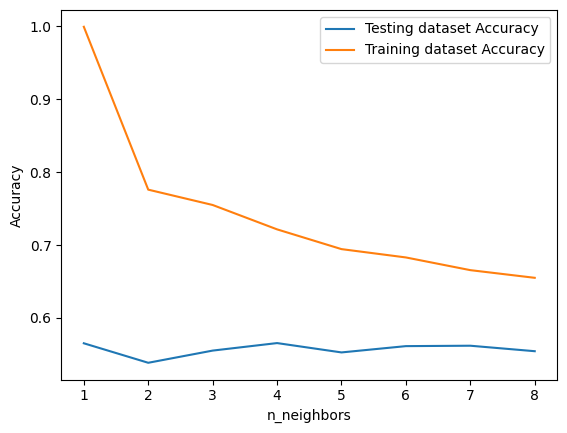

In [53]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    model_knn = sk_n.KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train_3,np.ravel(y_train_3))
      
    # Compute training and test data accuracy
    train_accuracy[i] = model_knn.score(x_train_3,y_train_3)
    test_accuracy[i] = model_knn.score(x_test_3,y_test_3)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [54]:
model_knn = sk_n.KNeighborsClassifier(n_neighbors=15)
model_knn.fit(x_train_3,np.ravel(y_train_3))
model_knn.score(x_test_3,y_test_3)

0.5532329988851727

### 5 Bins

In [55]:
model_knn = sk_n.KNeighborsClassifier(n_neighbors=7)
model_knn.fit(x_train_5,np.ravel(y_train_5))
model_knn.score(x_test_5,y_test_5)

0.3764399851356373

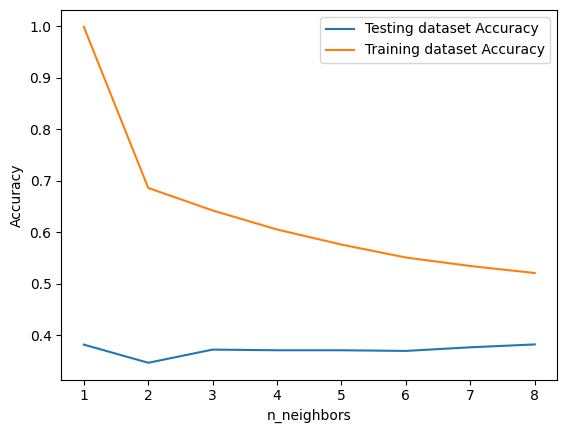

In [56]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    model_knn = sk_n.KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train_5,np.ravel(y_train_5))
      
    # Compute training and test data accuracy
    train_accuracy[i] = model_knn.score(x_train_5,y_train_5)
    test_accuracy[i] = model_knn.score(x_test_5,y_test_5)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Reviews

### Sentiment Analysis using Vader - Best Reviews

In [57]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 21.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [58]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk import sent_tokenize,word_tokenize 

In [59]:
review_.head()

listing_id         id        date  reviewer_id reviewer_name  \
0    34843927  585561271  2019-12-31     56285682          Eric   
1    34843927  589316569  2020-01-05    149607043       Vanessa   
2    34843927  589852238  2020-01-06    160618306          Ryan   
3    34843927  590205146  2020-01-07    250306395        Mollie   
4    34843927  590886527  2020-01-09    310087862       William   

                                            comments  
0  I truly felt the “Aloha Hospitality” here!  Ju...  
1  Wow vraiment beau et propre! Nous n'avons que ...  
2  Thanks for the accommodations was a safe comfo...  
3  Beautiful star gazing. Cool tent. A little har...  
4  We really enjoyed our stay. The balcony with t...

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
# best reviews:
listing_ids_best = list(list_full_[(list_full_['review_scores_rating'] == 5) & (list_full_['number_of_reviews'] > 100)]['id'])
print(len(listing_ids_best))
reviews_sentiment_best = review_.loc[review_['listing_id'].isin(listing_ids_best)].copy()
print(reviews_sentiment_best.shape)

pos_list=list()
neg_list=list()
neu_list=list()
compound_list=list()

analyzer = SentimentIntensityAnalyzer()
for row in reviews_sentiment_best.iterrows():
    texts = row[1]['comments']
    sentences = sent_tokenize(texts)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
    pos_list.append(pos)
    neg_list.append(neg)
    neu_list.append(neu)
    compound_list.append(compound)

reviews_sentiment_best['pos'] = pos_list
reviews_sentiment_best['neg'] = neg_list
reviews_sentiment_best['neu'] = neu_list
reviews_sentiment_best['compound'] = compound_list

#reviews_sentiment_best

21
(3544, 6)


In [62]:
reviews_sentiment_best.sort_values(by="compound",ascending=False)

listing_id                  id        date  reviewer_id reviewer_name  \
721514    39954034  476914696763054251  2021-10-19    144104276           Tom   
137087     4868423           298838364  2018-07-29    162937334       Cyrille   
414423    19863186  623378823897632253  2022-05-09    174664587         Chris   
227674    10249993           745167293  2021-04-03     28711363          Neha   
246105    11236991           146186325  2017-04-21     83227836         Ayumi   
...            ...                 ...         ...          ...           ...   
227433    10249993           152691063  2017-05-17    106525233     Christine   
300210    14778016           353614752  2018-11-28      3774732        Regula   
227652    10249993           616834204  2020-03-10     88306865          Katy   
513901    24102651           547359244  2019-10-14    132832558        Tobias   
235956    11045386           547767418  2019-10-15    286013247       Barbara   

                                                 comments       pos       neg  \
721514  Perfect spot central to everything and close t...  0.312000  0.000000   
137087  Great place, great welcome.<br/>Very nice, cal...  0.767000  0.000000   
414423  Laukapu Forest Cottage is an amazing place to ...  0.326000  0.000000   
227674  It’s one of the best Airbnb I have stayed at.t...  0.301000  0.000000   
246105  Perfect location and accommodations.<br/>Close...  0.443000  0.000000   
...                                                   ...       ...       ...   
227433  Das beste Airbnb, in dem wir jemals waren!<br/...  0.010273  0.160909   
300210  Das Condo war blitzsauber und Gammy oder Wade ...  0.000000  0.147000   
227652  Die Fotos in der Beschreibung haben uns bereit...  0.000000  0.120889   
513901  Die Unterkunft war sehr sauber und sehr schön,...  0.000000  0.461000   
235956  Für uns war das Cottage bei Rob und Bob die er...  0.000000  0.316000   

             neu  compound  
721514  0.688000  0.976400  
137087  0.233000  0.975800  
414423  0.674000  0.974100  
227674  0.699000  0.970900  
246105  0.557000  0.969400  
...          ...       ...  
227433  0.828818 -0.367182  
300210  0.853000 -0.399600  
227652  0.879111 -0.414244  
513901  0.539000 -0.918400  
235956  0.684000 -0.963300  

[3544 rows x 10 columns]

In [63]:
high_compound = reviews_sentiment_best[reviews_sentiment_best['compound'] > 0.8]
high_compound

listing_id                  id        date  reviewer_id reviewer_name  \
137056     4868423           236911712  2018-02-20     22311355         Chris   
137082     4868423           269088548  2018-05-26     26114939     Francisco   
137087     4868423           298838364  2018-07-29    162937334       Cyrille   
137090     4868423           319982760  2018-09-07     42869941     Christina   
137136     4868423           340119963  2018-10-22      1109660         Oisin   
...            ...                 ...         ...          ...           ...   
765268    44914704           736808548  2021-03-06     23641675         Alexa   
765353    44914704  388552219569341552  2021-06-19    153578961          Zack   
765368    44914704  453738089738891548  2021-09-17     16115971         David   
765390    44914704  461730431800844588  2021-09-28    101757104         Rohan   
765394    44914704  478422942352773035  2021-10-21     32198425          Carl   

                                                 comments       pos      neg  \
137056  Brigitte & Dave are wonderful hosts and mainta...  0.368286  0.00000   
137082  My wife and I were so sad to leave this beauti...  0.315750  0.01775   
137087  Great place, great welcome.<br/>Very nice, cal...  0.767000  0.00000   
137090  Beautiful cottage with a beautiful view. The h...  0.593667  0.00000   
137136  Amazing nice remote spot with fantastic view! ...  0.546500  0.00000   
...                                                   ...       ...      ...   
765268  Steve’s place is pretty perfect in all the imp...  0.472750  0.00000   
765353  This condo is extremely clean and perfect walk...  0.420000  0.00000   
765368  My best stay at airbnb ever, what a nice apart...  0.218000  0.00000   
765390  Nice location, friendly host, would definitely...  0.789000  0.00000   
765394  Great location and a lot of small things that ...  0.487000  0.00000   

             neu  compound  
137056  0.631714  0.811657  
137082  0.666500  0.851450  
137087  0.233000  0.975800  
137090  0.406333  0.814900  
137136  0.453500  0.855400  
...          ...       ...  
765268  0.527250  0.812150  
765353  0.580000  0.804700  
765368  0.782000  0.859100  
765390  0.211000  0.880700  
765394  0.513000  0.849333  

[141 rows x 10 columns]

### Topic Modeling Using reviews w/ compound score > 0.8

In [64]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 67.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [65]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [66]:
useless = ['great', 'best', 'good', 'awesome', 'perfect','recommend', 'airbnb', 'loved', 'amazing',
'wonderful', 'stay', 'thing','place', 'like', 'enjoy', 'super', 'definitely','felt','truly','highly',
'absolutely','house','home','enjoyed','room','inna','means','better','need','got','said','told','unit',
'reservation','property','check','day','days']


In [67]:
comments_list = []
for item in high_compound['comments']:
    comments_list.append(item)

for i in range(len(comments_list)):
    comment = comments_list[i]
    sents = sent_tokenize(comment)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    comments_list[i] = '. '.join(sents)

# print(comments_list)

texts = [[word for word in comment.lower().split()
        if word not in STOPWORDS and word.isalnum()and word.lower() not in useless]
        for comment in comments_list]

# print(texts[0])

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

num_topics = 5
passes = 10
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.019*"beach" + 0.019*"beautiful" + 0.017*"clean" + 0.012*"location" '
        '+ 0.012*"host" + 0.012*"apartment" + 0.008*"nice" + 0.008*"view"'),
    (   1,
        '0.031*"beautiful" + 0.020*"cottage" + 0.011*"host" + '
        '0.009*"experience" + 0.008*"provides" + 0.008*"nice" + '
        '0.008*"outstanding" + 0.008*"love"'),
    (   2,
        '0.024*"lovely" + 0.016*"host" + 0.016*"beautiful" + 0.014*"allison" + '
        '0.011*"time" + 0.011*"needed" + 0.008*"provided" + 0.008*"looking"'),
    (   3,
        '0.017*"cottage" + 0.014*"space" + 0.014*"beautiful" + '
        '0.013*"location" + 0.010*"comfortable" + 0.010*"beach" + '
        '0.010*"hosts" + 0.008*"nice"'),
    (   4,
        '0.032*"beautiful" + 0.021*"nice" + 0.019*"clean" + 0.017*"location" + '
        '0.013*"friendly" + 0.010*"experience" + 0.009*"cottage" + '
        '0.009*"peaceful"')]


In [68]:
!pip install wordcloud
#==1.8.2.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 52.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


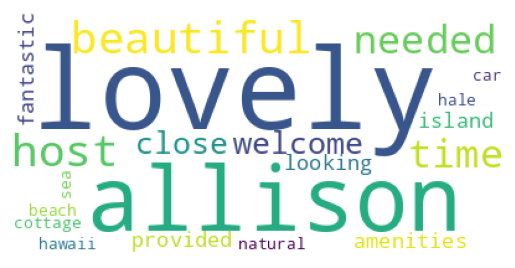

In [69]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
#         freq = int(prob/prob_total*1000)
        freq = int(prob/prob_total*100)
        alist=[word]
        word_list.extend(alist*freq)
        
#     print(word_list)
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import shuffle
    shuffle(word_list)
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)

    return None
    
draw_wordcloud(lda,2)

### Sentiment Analysis using Vader - Worst Reviews

In [70]:
# worst reviews:
listing_ids_worst = list(list_full_[list_full_['review_scores_rating'] <= 3]['id'])
print(len(listing_ids_worst))
reviews_sentiment_worst = review_.loc[review_['listing_id'].isin(listing_ids_worst)].copy()
print(reviews_sentiment_worst.shape)

pos_list=list()
neg_list=list()
neu_list=list()
compound_list=list()

analyzer = SentimentIntensityAnalyzer()
for row in reviews_sentiment_worst.iterrows():
    texts = row[1]['comments']
    sentences = sent_tokenize(texts)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
    pos_list.append(pos)
    neg_list.append(neg)
    neu_list.append(neu)
    compound_list.append(compound)

reviews_sentiment_worst['pos'] = pos_list
reviews_sentiment_worst['neg'] = neg_list
reviews_sentiment_worst['neu'] = neu_list
reviews_sentiment_worst['compound'] = compound_list

# reviews_sentiment_worst

216
(344, 6)


In [71]:
reviews_sentiment_worst.sort_values(by="compound",ascending=True)

listing_id                  id        date  reviewer_id  \
853687            51270984  459568039889962777  2021-09-25    224701396   
823997            49125372  403061754801867749  2021-07-09     54855449   
898131  596363052112210685  632732762031925621  2022-05-22    308312027   
903709  658181901772601301  668359877404047925  2022-07-10    467127314   
897929  596144137587429785  671992951396347797  2022-07-16    122062775   
...                    ...                 ...         ...          ...   
753741            43148250           770289637  2021-06-13    122558240   
830968            49673135  683504094417959674  2022-07-31    456866741   
680777            36568218           563135470  2019-11-11    188349762   
618141            31490968           438482611  2019-04-16     27240215   
760767            44325071           759992369  2021-05-18    382264972   

       reviewer_name                                           comments  \
853687      Abdollah  My experience with the location and cleanest o...   
823997        Krista  The beds are really hard and there are lots of...   
898131       Condito  Die Anlage ist sehr schön<br/><br/>Über das Zi...   
903709        Nicole  Andre is the worst human he is a sammer and so...   
897929        Nikita  be careful when you book with vacasa as they c...   
...              ...                                                ...   
753741            Le  Great location, cute decorations, cleanliness ...   
830968      Octavius  If you’re looking for a cheap stay in an expen...   
680777       Damaris  Beautiful view on a great resort with an amazi...   
618141      Natallia  Pros:<br/>amazing location, gorgeous view, ful...   
760767        Carrie  Great location, very clean, nice host all arou...   

          pos       neg       neu  compound  
853687  0.006  0.068000  0.926000 -0.913000  
823997  0.000  0.319000  0.681000 -0.883200  
898131  0.000  0.264333  0.735667 -0.742567  
903709  0.000  0.255000  0.745000 -0.624900  
897929  0.023  0.092000  0.885000 -0.596000  
...       ...       ...       ...       ...  
753741  0.667  0.000000  0.333000  0.875000  
830968  0.354  0.000000  0.646000  0.886000  
680777  0.628  0.000000  0.372000  0.915300  
618141  0.287  0.000000  0.713000  0.923100  
760767  0.613  0.000000  0.387000  0.935700  

[344 rows x 10 columns]

In [72]:
low_compound = reviews_sentiment_worst[reviews_sentiment_worst['compound'] < 0.1]
# low_compound

### Topic Modeling Using reviews w/ compound score < 0.1

In [73]:
comments_list_worst = []
for item in low_compound['comments']:
    comments_list_worst.append(item)

for i in range(len(comments_list_worst)):
    comment = comments_list_worst[i]
    sents = sent_tokenize(comment)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    comments_list_worst[i] = '. '.join(sents)

texts_worst = [[word for word in comment.lower().split()
        if word not in STOPWORDS and word.isalnum()and word.lower() not in useless]
        for comment in comments_list_worst]

dictionary_worst = corpora.Dictionary(texts_worst)
corpus_worst = [dictionary_worst.doc2bow(text) for text in texts_worst]

num_topics = 5
passes = 10
lda_worst = LdaModel(corpus_worst,
              id2word=dictionary_worst,
              num_topics=num_topics,
              passes=passes)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_worst.print_topics(num_words=8))

[   (   0,
        '0.013*"host" + 0.006*"paid" + 0.005*"pictures" + 0.005*"night" + '
        '0.005*"location" + 0.005*"water" + 0.004*"time" + 0.004*"refund"'),
    (   1,
        '0.016*"host" + 0.010*"service" + 0.007*"left" + 0.006*"booked" + '
        '0.006*"time" + 0.006*"door" + 0.006*"beach" + 0.005*"booking"'),
    (   2,
        '0.005*"shower" + 0.005*"wir" + 0.005*"old" + 0.005*"bathroom" + '
        '0.004*"roaches" + 0.004*"time" + 0.004*"beach" + 0.004*"parking"'),
    (   3,
        '0.006*"housekeeping" + 0.006*"staying" + 0.005*"time" + 0.005*"door" '
        '+ 0.005*"night" + 0.005*"paid" + 0.005*"different" + 0.005*"needed"'),
    (   4,
        '0.008*"hotel" + 0.007*"called" + 0.006*"asked" + 0.006*"host" + '
        '0.005*"car" + 0.004*"cleaning" + 0.004*"early" + 0.004*"toilet"')]


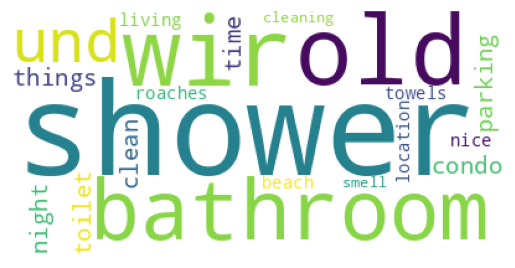

In [74]:
draw_wordcloud(lda_worst,2)

### Geojson

In [75]:
import geopandas as gpd
df_geo = gpd.read_file('neighbourhoods.geojson')
df_geo

neighbourhood neighbourhood_group  \
0               Koolauloa            Honolulu   
1        North Shore Oahu            Honolulu   
2                 Waianae            Honolulu   
3              Koolaupoko            Honolulu   
4            Central Oahu            Honolulu   
5       North Shore Kauai               Kauai   
6            Kapaa-Wailua               Kauai   
7           Waimea-Kekaha               Kauai   
8                   Lihue               Kauai   
9         Hanapepe-Eleele               Kauai   
10            Koloa-Poipu               Kauai   
11                Molokai                Maui   
12                Lahaina                Maui   
13        Wailuku-Kahului                Maui   
14             Paia-Haiku                Maui   
15                  Lanai                Maui   
16                   Hana                Maui   
17           Kihei-Makena                Maui   
18              Kahoolawe                Maui   
19                Hamakua              Hawaii   
20           South Kohala              Hawaii   
21             North Hilo              Hawaii   
22             South Hilo              Hawaii   
23             North Kona              Hawaii   
24           North Kohala              Hawaii   
25                   Puna              Hawaii   
26                    Kau              Hawaii   
27             South Kona              Hawaii   
28   Primary Urban Center            Honolulu   
29                    Ewa            Honolulu   
30   Primary Urban Center            Honolulu   
31   Primary Urban Center            Honolulu   
32          East Honolulu            Honolulu   
33  Makawao-Pukalani-Kula                Maui   

                                             geometry  
0   MULTIPOLYGON (((-158.00347 21.69941, -158.0028...  
1   MULTIPOLYGON (((-158.02224 21.69103, -158.0219...  
2   MULTIPOLYGON (((-158.26744 21.57220, -158.2673...  
3   MULTIPOLYGON (((-157.83830 21.53446, -157.8381...  
4   MULTIPOLYGON (((-157.92108 21.53219, -157.9209...  
5   MULTIPOLYGON (((-159.40448 22.22918, -159.4044...  
6   MULTIPOLYGON (((-159.33158 22.19300, -159.3313...  
7   MULTIPOLYGON (((-159.69701 22.16169, -159.6970...  
8   MULTIPOLYGON (((-159.45149 22.06189, -159.4476...  
9   MULTIPOLYGON (((-159.50306 22.05268, -159.4991...  
10  MULTIPOLYGON (((-159.49322 21.97766, -159.4922...  
11  MULTIPOLYGON (((-157.19720 21.21427, -157.1969...  
12  MULTIPOLYGON (((-156.62697 21.02254, -156.6265...  
13  MULTIPOLYGON (((-156.58237 21.01779, -156.5821...  
14  MULTIPOLYGON (((-156.32796 20.94421, -156.3278...  
15  MULTIPOLYGON (((-156.98807 20.92921, -156.9880...  
16  MULTIPOLYGON (((-156.19115 20.88776, -156.1909...  
17  MULTIPOLYGON (((-156.55399 20.83973, -156.5515...  
18  MULTIPOLYGON (((-156.57218 20.60308, -156.5721...  
19  MULTIPOLYGON (((-155.69984 20.18567, -155.6994...  
20  MULTIPOLYGON (((-155.70545 20.11025, -155.6994...  
21  MULTIPOLYGON (((-155.28469 20.01916, -155.2845...  
22  MULTIPOLYGON (((-155.12853 19.90004, -155.1283...  
23  MULTIPOLYGON (((-155.88483 19.91049, -155.8837...  
24  MULTIPOLYGON (((-155.87222 20.26316, -155.8719...  
25  MULTIPOLYGON (((-154.99055 19.71630, -154.9904...  
26  MULTIPOLYGON (((-155.35286 19.58976, -155.3524...  
27  MULTIPOLYGON (((-155.95546 19.51061, -155.9551...  
28  MULTIPOLYGON (((-157.87518 21.45657, -157.8749...  
29  MULTIPOLYGON (((-158.04696 21.41613, -158.0436...  
30  MULTIPOLYGON (((-157.88030 21.31254, -157.8803...  
31  MULTIPOLYGON (((-157.96070 21.36958, -157.9608...  
32  MULTIPOLYGON (((-157.65279 21.30893, -157.6527...  
33  MULTIPOLYGON (((-156.40127 20.82874, -156.3978...

In [76]:
!pip install shapely --upgrade
!pip install geojsonio --upgrade
!pip install folium --upgrade

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 KB 27.4 MB/s eta 0:00:00
  Created wheel for geojsonio: filename=geojsonio-0.0.3-py3-none-any.whl size=5041 sha256=ef94f9559b8605f44646a6ab2db7eb8296e147725c5c9cd32b445c88ae1f7ec0
  Stored in directory: /root/.cache/pip/wheels/e7/b2/e2/921bfd3faf1079a0532f2ff0bef397f4e2b40bce35d3e52153
Successfully built geojsonio
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [77]:
from shapely.geometry import Point,Polygon
import geojsonio

In [78]:
list_full_orig['price'] = list_full_orig['price'].astype(str)
list_full_orig['price'] = list_full_orig['price'].str.replace('$','')
list_full_orig['price'] = list_full_orig['price'].str.replace(',','')
list_full_orig['price'] = list_full_orig['price'].astype(float)

/tmp/ipykernel_146/3732667939.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  list_full_orig['price'] = list_full_orig['price'].str.replace('$','')


In [79]:
list_full_orig

id  latitude  longitude host_response_rate host_acceptance_rate  \
1      34843927  19.66220 -155.95681                99%                  99%   
2      35067513  20.91764 -156.68840               100%                 100%   
4      34857616  21.90589 -159.46809                99%                  75%   
6          5269  20.02740 -155.70200                80%                  73%   
7          5387  19.43081 -155.88069               100%                  99%   
...         ...       ...        ...                ...                  ...   
28571  15468648  21.61664 -157.91275               100%                 100%   
28573  11967793  19.75305 -155.08972               100%                 100%   
28574  17751486  20.95861 -156.68555                96%                 100%   
28575  32448015  19.96992 -155.84321               100%                 100%   
28577  27209676  19.96680 -155.84840               100%                  98%   

      host_is_superhost  host_listings_count  host_total_listings_count  \
1                     f                  3.0                        7.0   
2                     t                  2.0                        2.0   
4                     t                581.0                      628.0   
6                     t                  3.0                       18.0   
7                     f                  3.0                        3.0   
...                 ...                  ...                        ...   
28571                 f                  6.0                       22.0   
28573                 f                  1.0                        1.0   
28574                 f                121.0                      221.0   
28575                 t                  6.0                        6.0   
28577                 t                327.0                      382.0   

        price neighbourhood_cleansed  ... number_of_reviews_l30d  \
1        83.0             North Kona  ...                      3   
2       622.0                Lahaina  ...                      0   
4       206.0            Koloa-Poipu  ...                      0   
6       149.0           South Kohala  ...                      0   
7        91.0             South Kona  ...                      3   
...       ...                    ...  ...                    ...   
28571   250.0              Koolauloa  ...                      0   
28573   295.0             South Hilo  ...                      0   
28574   234.0                Lahaina  ...                      2   
28575   300.0           South Kohala  ...                      0   
28577  2300.0           South Kohala  ...                      0   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
1                     4.41                    4.46                       4.40   
2                     5.00                    4.97                       4.99   
4                     5.00                    5.00                       5.00   
6                     4.65                    4.83                       4.35   
7                     4.65                    4.67                       4.44   
...                    ...                     ...                        ...   
28571                 4.54                    4.60                       4.54   
28573                 5.00                    5.00                       5.00   
28574                 4.90                    4.90                       4.85   
28575                 4.72                    4.78                       4.53   
28577                 5.00                    5.00                       5.00   

      review_scores_checkin review_scores_communication  \
1                      4.65                        4.61   
2                      4.99                        5.00   
4                      5.00                        5.00   
6                      5.00                        4.87   
7                      4.85                        4.87   
...    

In [80]:
import folium
from IPython.core.display import display, HTML

def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

m = folium.Map(location = [20.6994140,-157.5828],zoom_start=6.5)

locations_low = list_full_orig[(list_full_orig['price'] >= 0) & (list_full_orig['price'] <= bin_1_end)][['latitude','longitude']]
locationlist_low = locations_low.values.tolist()

locations_medium = list_full_orig[(list_full_orig['price'] >= bin_2_start) & (list_full_orig['price'] <= bin_2_end)][['latitude','longitude']]
locationlist_medium = locations_medium.values.tolist()

locations_high = list_full_orig[(list_full_orig['price'] >= bin_3_start) & (list_full_orig['price'] <= bin_3_end)][['latitude','longitude']]
locationlist_high = locations_high.values.tolist()


for point in range(len(locationlist_low)):
    folium.CircleMarker(locationlist_low[point],fill = True,color = 'blue',radius = 1,fill_color = 'red').add_to(m)

for point in range(len(locationlist_medium)):
    folium.CircleMarker(locationlist_medium[point],fill = True,color = 'orange',radius = 1,fill_color = 'red').add_to(m)

for point in range(len(locationlist_high)):
    folium.CircleMarker(locationlist_high[point],fill = True,color = 'red',radius = 1,fill_color = 'red').add_to(m)



/tmp/ipykernel_146/2289349089.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [81]:
folium_deepnote_show(m)

m.save_to_html()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07ae8ec0-7a2e-44fb-95c4-cdcd01c612aa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>